# **HR Analytics: Exploratory data analysis and modeling**

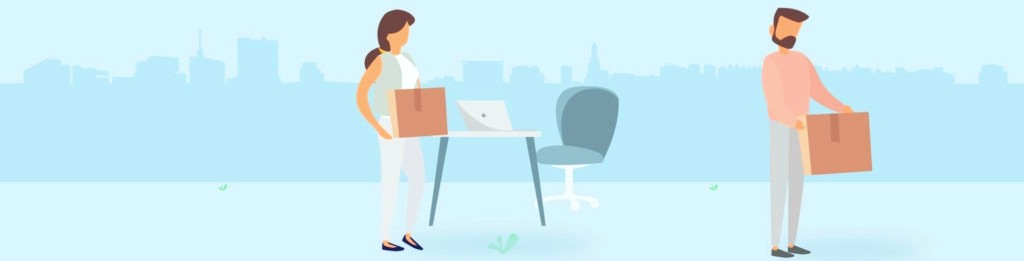

-------


# Introduction
#### HR Analytics Case Study Dataset provides informations about job satisfaction, working enviornment, job involvement and other general data about the employee.In this kernel my focus will be on the important question - ** Why employees leave the company?**  The goal of this kernel is to predict Attrition and analyzing the factors causing it.

-----------


# 1) Loading and Understanding Data
----


## 1.1 importing needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
emp_gen_info = pd.read_csv("../input/hr-analytics-case-study/general_data.csv")
emp_survey = pd.read_csv("../input/hr-analytics-case-study/employee_survey_data.csv")
man_survey = pd.read_csv("../input/hr-analytics-case-study/manager_survey_data.csv")
in_time = pd.read_csv("../input/hr-analytics-case-study/in_time.csv")
out_time = pd.read_csv("../input/hr-analytics-case-study/out_time.csv")

In [ ]:
print("emp_gen_info:",emp_gen_info.shape)
print("emp_survey:",emp_survey.shape)
print("man_survey:",man_survey.shape)

In [ ]:
emp_gen_info.head()

In [ ]:
emp_survey.head()

In [ ]:
man_survey.head()

###### combining these three columns for better understanding of data.

In [ ]:
emp_gen_info.set_index('EmployeeID', inplace=True)
emp_survey.set_index('EmployeeID', inplace=True)
man_survey.set_index('EmployeeID', inplace=True)

In [ ]:
Employee =  pd.concat([emp_gen_info, emp_survey, man_survey], axis = 1)
Employee.head()

###### Checking unique values in every column

In [ ]:
Employee.T.apply(lambda columns: columns.nunique(), axis=1)

###### as there are columns [EmployeeCount],[Over18],[StandardHours],having non unique values thus can be removed as they provide no additional information

In [ ]:
Employee.drop(['EmployeeCount', 'Over18','StandardHours'], axis=1,inplace = True)

###### check data types

In [ ]:
Employee.dtypes

###### There is some data of object type which must be converted to numerical data  

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
Employee['BusinessTravel'] = labelEncoder_X.fit_transform(Employee['BusinessTravel'])
Employee['Department'] = labelEncoder_X.fit_transform(Employee['Department'])
Employee['EducationField'] = labelEncoder_X.fit_transform(Employee['EducationField'])
Employee['Gender'] = labelEncoder_X.fit_transform(Employee['Gender'])
Employee['JobRole'] = labelEncoder_X.fit_transform(Employee['JobRole'])
Employee['MaritalStatus'] = labelEncoder_X.fit_transform(Employee['MaritalStatus'])
Employee['Attrition'] = labelEncoder_X.fit_transform(Employee['Attrition'])

In [ ]:
Employee.dtypes

###### Check for any null values in the dataframe

In [ ]:
Employee.isnull().any()

###### as there is some data missing in the columns named [NumCompaniesWorked] & [TotalWorkingYears] we will replace these values by the mean of their respective column

In [ ]:
meanOfNumCompaniesWorked = Employee["NumCompaniesWorked"].astype('float').mean(axis = 0 )
Employee["NumCompaniesWorked"].replace(np.nan,meanOfNumCompaniesWorked,inplace = True)

meanOfTotalWorkingYears = Employee["TotalWorkingYears"].astype('float').mean(axis = 0 )
Employee["TotalWorkingYears"].replace(np.nan,meanOfTotalWorkingYears,inplace = True)

meanOfEnvironmentSatisfaction = round(Employee["EnvironmentSatisfaction"].astype('float').mean(axis = 0 ))
Employee["EnvironmentSatisfaction"].replace(np.nan,meanOfEnvironmentSatisfaction,inplace = True)

meanOfJobSatisfaction = round(Employee["JobSatisfaction"].astype('float').mean(axis = 0 ))
Employee["JobSatisfaction"].replace(np.nan,meanOfJobSatisfaction,inplace = True)

meanOfWorkLifeBalance = round(Employee["WorkLifeBalance"].astype('float').mean(axis = 0 ))
Employee["WorkLifeBalance"].replace(np.nan,meanOfWorkLifeBalance,inplace = True)


In [ ]:
Employee.head()

-----

## 1.2 Exploring in_time and out_time dataframes

###### We have two tables remaining [in_time]&[out_time]. Containing the daily in time and out time of the employees. Let's see how we can make sense of this data

In [ ]:
import datetime as dt

In [ ]:
print("in_time:",in_time.shape)
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
in_time.set_index('EmployeeID', inplace=True)
in_time.head()

In [ ]:
print("out_time:",in_time.shape)
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.set_index('EmployeeID', inplace=True)
out_time.head()

###### As  per the above data we will find out  [total working hours spent by employee in the company] , [leaves taken on friday and monday] 

###### Total time Spent Every day

In [ ]:
in_time_stamp = in_time.apply(pd.to_datetime) #converting into timestamp object
out_time_stamp = out_time.apply(pd.to_datetime)
df_working_hours = (out_time_stamp - in_time_stamp)# time spent in the company
df_working_hours.head()


###### mean of the total time spent

In [ ]:
df_working_time= df_working_hours / np.timedelta64(1, 'h') #converting time spent to float value
df_working_time.head()
mean_working_hours = df_working_time.mean(axis=1)# mean time spend in company in above period
Employee['MeanWorkingHours'] = mean_working_hours
emp_gen_info['MeanWorkingHours'] = mean_working_hours #** adding to the dataframe

###### checking leaves on particular days [mondays and fridays]

In [ ]:
import calendar

In [ ]:
in_time_stamp.head()
week_day = in_time_stamp.dropna(how='all', axis=1) # drop columns with every value as NaT as they are public holidays
week_day.head()
col_list =list( week_day.columns)#converting columns to list
df_col_list = pd.DataFrame(col_list)#coverting list to pandas dataframe
df_col_list_stamp = df_col_list.apply(pd.to_datetime)#convert df to datetime object
df_col_list_stamp[0] = df_col_list_stamp[0].dt.weekday # df to day of week 0 for monday and 6 for sunday
weekday_list=list(df_col_list_stamp[0])# creating list of weekdays for renaming columns
week_day.columns = [weekday_list]#renaming columns
Employee['TotalLeave']=week_day.isna().sum(axis=1)#Adding total leaves to the employee dataframe
emp_gen_info['TotalLeave']=week_day.isna().sum(axis=1)
Employee['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1) # leave on monday and friday
emp_gen_info['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1)

-------

# 2) Data Exploration & Visualization

## 2.1 Univariate analysis
###### let's see what's in data

In [ ]:
Employee.hist(figsize=(30,20),grid = False);

### Analysis of Attrition among some of these groups

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=emp_gen_info, palette='pastel');
plt.title('BusinessTravel')

plt.subplot(1,3,2)
sns.countplot(x='Department', hue='Attrition', data=emp_gen_info, palette='pastel');
plt.title('Department')

plt.subplot(1,3,3)
sns.countplot(x='StockOptionLevel', hue='Attrition', data=emp_gen_info, palette='pastel');
plt.title('StockOptionLevel')

plt.show()


In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.kdeplot(emp_gen_info['Age'][emp_gen_info.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(emp_gen_info['Age'][emp_gen_info.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution Of Age', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,2)
sns.kdeplot(emp_gen_info['DistanceFromHome'][emp_gen_info.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(emp_gen_info['DistanceFromHome'][emp_gen_info.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Distance From Home', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,3)
sns.kdeplot(emp_gen_info['TotalWorkingYears'][emp_gen_info.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(emp_gen_info['TotalWorkingYears'][emp_gen_info.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Total Working Years', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])


plt.show()

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.violinplot(data=Employee, x='Attrition', y='JobSatisfaction', palette='pastel')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=Employee, x='Attrition', y='EnvironmentSatisfaction', palette='pastel')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=Employee, x='Attrition', y='JobInvolvement', palette='pastel')
plt.title('JobInvolvement')

plt.show()

###### from the  above graps we gan get an idea of what attrition among these groups look like but we cannot deduce that what features effect the attrition most. For that we can use corelation matrix which gives linear corelation of each of these groups with one another, also we can deduce that what factors are most effecting the attrition 

----

## 2.2) corelation matrix 
###### corelation gives us understanding about how strongly the features are linearly corelated (whether positively or negatively)

In [ ]:

matrix = np.triu(Employee.corr())
plt.figure(figsize = (25, 15))
sns.heatmap(Employee.corr(), annot = True, linewidth = 0.02,cmap = 'RdYlGn', mask=matrix)
plt.show()

###### from the above co relation matrix it is clear that [meanworking hours],[age],[totalworking years], are highly co-related with attrition than others let's plot those and see what data has to say

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='MeanWorkingHours', data=Employee, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='Age', data=Employee, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=Employee, palette='pastel');
plt.show()


###### From the graph it can be seen that
1. Those employees who left spent more working hoyrs working in the company
2. Those who left company were of less age
3. Employees who were working for less years are more likely to leave

In [ ]:
plt.figure(figsize=(25,6))
sns.kdeplot(emp_gen_info['MeanWorkingHours'][emp_gen_info.Attrition=='Yes'], shade=True, color='orangered');
sns.kdeplot(emp_gen_info['MeanWorkingHours'][emp_gen_info.Attrition=='No'], shade=True, color='royalblue');
plt.title('Distribution Of MeanWorkingHours', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)']);


###### from this distribution we can say employees who stay spend less time in the office usually around 6 to 8 hours but those who left were working for more hours

------------

# 3) Dimensionality Reduction

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer


### Normalizing Data
#### It is important to normalize data so that all the feature are between fixed range 

In [ ]:
scaler = StandardScaler()
scaler.fit(Employee)
Employee_scaled = scaler.transform(Employee)

## 3.1) Dimensionality Reduction using PCA

######  Principal component analysis (PCA) is a technique for reducing the dimensionality datasets, increasing interpretability but at the same time minimizing information loss. 
* Basic idea is to reduce the dimensions of high dimensional data
* Preserving the Key Properties like distances between the datapoints
* so that the data visualization becomes easy

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
Employee_pca = pca.fit_transform(Employee_scaled)
Employee_pca.shape

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(Employee_pca[:,0],Employee_pca[:,1],c=Employee['Attrition']);


* 

## 3.2) Dimension reduction using isomap

###### Isomap stands for isometric mapping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension
* Idea is similar to pca reducing dimensionaity by preserving the key properties like distance between the points 
* But here the distance is geodesic distances rather than the Euclidean distances

In [ ]:
from sklearn.manifold import TSNE, Isomap


In [ ]:
iso = Isomap(n_components=3, n_neighbors=20)
Employee_iso = iso.fit_transform(Employee_scaled)
Employee_scaled.shape

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(Employee_iso[:,0],Employee_iso[:,1],c=Employee['Attrition']);

-------

# 4)Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Employee['Attrition']
x = Employee.drop('Attrition', axis = 1)

-----

## 4.1) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

* split

In [ ]:
X_train_lr,X_test_lr, y_train_lr, y_test_lr = train_test_split(x,y, test_size = 0.20, random_state=39)

* scaling

In [ ]:
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.fit_transform(X_test_lr)
print(X_train_lr.shape,X_test_lr.shape)

* training

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr,y_train_lr)
LR

* predicting

In [ ]:
yhat_LR = LR.predict(X_test_lr)
print(yhat_LR[0:5])
print(y_test_lr[0:5])

* Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [ ]:
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test_lr,yhat_LR))
print("FI SCORE: ", f1_score(y_test_lr, yhat_LR, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test_lr, yhat_LR)) 

-----

## 4.2) Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

* split

In [ ]:
X_train_dt,X_test_dt, y_train_dt, y_test_dt= train_test_split(x,y, test_size = 0.20, random_state=41)

* scale

In [ ]:
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.fit_transform(X_test_dt)
print(X_train_dt.shape,X_test_dt.shape)

* training

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT.fit(X_train_dt,y_train_dt)

* predicting

In [ ]:
yhat_DT = DT.predict(X_test_dt)
print (yhat_DT [0:5])
print (y_test_dt [0:5])

* Evaluation

In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_dt,yhat_DT))
print("FI SCORE: ", f1_score(y_test_dt, yhat_DT, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test_dt, yhat_DT)) 

## 4.3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

* split

In [ ]:
X_train_rf,X_test_rf, y_train_rf, y_test_rf= train_test_split(x,y, test_size = 0.20, random_state=41)

* scale

In [ ]:
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.fit_transform(X_test_rf)
print(X_train_rf.shape,X_test_rf.shape)

* train

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_rf,y_train_rf)

* predict

In [ ]:
yhat_RF = RF.predict(X_test_rf)
print (yhat_RF [0:5])
print (y_test_rf [0:5])

* Evaluate

In [ ]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test_rf,yhat_RF))
print("FI SCORE: ", f1_score(y_test_rf, yhat_RF, average='weighted') )
print("jaccard_similarity_score: ", jaccard_similarity_score(y_test_rf, yhat_RF)) 

-----

# 5) Relative feature Importance

In [ ]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:40]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_rf.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
fig = plt.figure(figsize=(25, 10));
plt.title("Relative Feature importances")
plt.bar(range(X_train_rf.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_rf.shape[1]), indices)
plt.xlim([-1, X_train_rf.shape[1]])
plt.show();

-----

# 6) Observations and Results

### From the above plot it is evident that some features impact the attrition more than others those features are 
### Mean Working Hours
### Age
### Monthly Income
### Total Working Years
### Years At Company
### Distance From Home
#### these features are the major features which effect attrition the most

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='MeanWorkingHours', data=Employee, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='Age', data=Employee, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=Employee, palette='pastel');
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=Employee, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=Employee, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='DistanceFromHome', data=Employee, palette='pastel');
plt.show()

------

# 7) Conclusion

#### The Employees Who spend more hours in the office are more likely to quit than others and employees who are young and had spent less time with company and has been working for lesser number of years in the industry can quit working compared to others.